In [39]:
import torch
from torchvision import datasets

In [2]:
data_path = './datasets/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets/
Files already downloaded and verified


In [4]:
from torchvision import transforms

In [5]:
tensor_cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.ToTensor())

In [6]:
import matplotlib.pyplot as plt

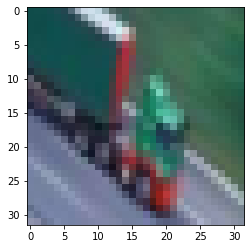

In [9]:
img_t, _ = tensor_cifar10[50]
plt.imshow(img_t.permute(1, 2, 0))

plt.show()

In [10]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [11]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [12]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [13]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [14]:
transformed_cifar10 = datasets.CIFAR10(
  data_path,
  train=True,
  download=False,
  transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2470, 0.2435, 0.2616))
]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


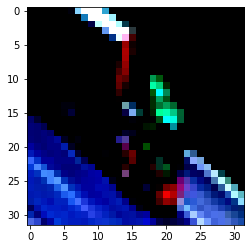

In [16]:
img_t, _ = transformed_cifar10[50]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [23]:
preprocess = transforms.Compose([
  transforms.ToTensor()
])

In [24]:
label_map = {1: 0, 9: 1, 4: 2 }
class_names = ['automobile', 'truck', 'deer']

cifar2 = [(preprocess(img), label_map[label])
          for img, label in cifar10
          if label in [1, 9, 4]]
cifar2_val = [(preprocess(img), label_map[label])
              for img, label in cifar10_val
              if label in [1, 9, 4]]

In [25]:
import torchvision.transforms.functional

In [31]:
train_loader = torch.utils.data.DataLoader(
    cifar2, 
    batch_size=128, 
    shuffle=True)
val_loader = torch.utils.data.DataLoader(
    cifar2_val,
    batch_size=128,
    shuffle=False)

In [47]:
learning_rate = 1e-3
model = torch.nn.Sequential(
  torch.nn.Linear(3072, 1024),
  torch.nn.Tanh(),
  torch.nn.Linear(1024, 512),
  torch.nn.Tanh(),
  torch.nn.Linear(512, 128),
  torch.nn.Tanh(),
  torch.nn.Linear(128, 3),
  torch.nn.LogSoftmax(dim=1))

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.NLLLoss()

n_epochs = 200

for epoch in range(n_epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    loss = loss_fn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.086385
Epoch: 1, Loss: 1.058197
Epoch: 2, Loss: 1.054489
Epoch: 3, Loss: 1.053309
Epoch: 4, Loss: 1.078442
Epoch: 5, Loss: 1.019952
Epoch: 6, Loss: 1.034665
Epoch: 7, Loss: 0.978997
Epoch: 8, Loss: 0.970478
Epoch: 9, Loss: 1.027714
Epoch: 10, Loss: 0.912240
Epoch: 11, Loss: 0.927990
Epoch: 12, Loss: 0.878306
Epoch: 13, Loss: 0.749323
Epoch: 14, Loss: 0.957643
Epoch: 15, Loss: 1.017423
Epoch: 16, Loss: 0.803906
Epoch: 17, Loss: 0.869398
Epoch: 18, Loss: 0.917595
Epoch: 19, Loss: 0.898324
Epoch: 20, Loss: 0.757743
Epoch: 21, Loss: 0.791250
Epoch: 22, Loss: 0.934719
Epoch: 23, Loss: 0.812626
Epoch: 24, Loss: 0.662544
Epoch: 25, Loss: 0.742634
Epoch: 26, Loss: 0.985073
Epoch: 27, Loss: 0.610832
Epoch: 28, Loss: 0.885966
Epoch: 29, Loss: 0.913691
Epoch: 30, Loss: 0.747874
Epoch: 31, Loss: 0.833263
Epoch: 32, Loss: 0.774050
Epoch: 33, Loss: 0.797832
Epoch: 34, Loss: 0.752107
Epoch: 35, Loss: 0.959638
Epoch: 36, Loss: 0.811857
Epoch: 37, Loss: 0.754959
Epoch: 38, Loss: 0.779

In [48]:


correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]

    outputs = model(imgs.view(batch_size, -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())

print("Accuracy: %f", correct / total)


Accuracy: %f 0.7076666666666667


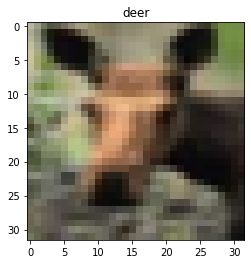

In [58]:
img_t, label = cifar2[131]
plt.imshow(img_t.permute(1, 2, 0))
plt.title(class_names[label])
plt.show()

In [59]:
out = model(img_t.view(1, -1))

In [60]:
_, index = torch.max(out, dim=1)
class_names[index]

'deer'

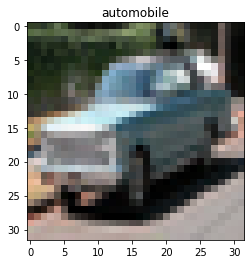

In [80]:
img_t, label = cifar2[12]
plt.imshow(img_t.permute(1, 2, 0))
plt.title(class_names[label])
plt.show()

In [81]:
out = model(img_t.view(1, -1))

In [82]:
_, index = torch.max(out, dim=1)
class_names[index]

'automobile'

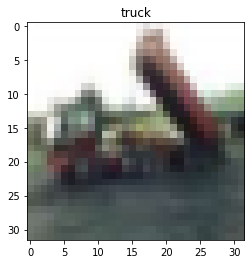

In [64]:
img_t, label = cifar2[1]
plt.imshow(img_t.permute(1, 2, 0))
plt.title(class_names[label])
plt.show()

In [65]:
out = model(img_t.view(1, -1))

In [66]:
_, index = torch.max(out, dim=1)
class_names[index]

'truck'